In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

In [ ]:
url = 'https://drive.google.com/file/d/1Yx_DYY6a_S2xEomiAj38eGuro05XcoEI/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
categories_df = pd.read_csv(path)
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_order          53231 non-null  int64  
 1   product_quantity  53231 non-null  int64  
 2   sku               53231 non-null  object 
 3   unit_price        53231 non-null  float64
 4   date              53231 non-null  object 
 5   name              53231 non-null  object 
 6   desc              53231 non-null  object 
 7   price             53231 non-null  float64
 8   type              52904 non-null  float64
 9   discount          53231 non-null  float64
 10  product_category  53231 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 4.5+ MB


In [ ]:
categories_df['date'] = pd.to_datetime(categories_df['date'])
categories_df["month"] = categories_df["date"].dt.month
categories_df["year"] = categories_df["date"].dt.year
categories_df['type'] = pd.to_numeric(categories_df['type']).astype('Int64')
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_order          53231 non-null  int64         
 1   product_quantity  53231 non-null  int64         
 2   sku               53231 non-null  object        
 3   unit_price        53231 non-null  float64       
 4   date              53231 non-null  datetime64[ns]
 5   name              53231 non-null  object        
 6   desc              53231 non-null  object        
 7   price             53231 non-null  float64       
 8   type              52904 non-null  Int64         
 9   discount          53231 non-null  float64       
 10  product_category  53231 non-null  object        
 11  month             53231 non-null  int64         
 12  year              53231 non-null  int64         
dtypes: Int64(1), datetime64[ns](1), float64(3), int64(4), object(4)
memory usage

In [ ]:
categories_df['discount %'] = categories_df['discount'] / categories_df['price'] * 100
categories_df

,id_order,product_quantity,sku,unit_price,date,name,desc,price,type,discount,product_category,month,year,discount %
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,13.50,Hard Drives Accessories,1,2017,22.134776
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,5720,3.96,Stands & Supports,1,2017,17.254902
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,13005399,16.81,Charger,1,2017,18.887640
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,1298,16.09,Open - Accessories & Gadgets,1,2017,20.898818
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,11905404,157.50,Other,1,2017,52.501750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,527035,1,APP0698,9.99,2018-03-14 11:42:41,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018,60.040000
53227,527070,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018,60.040000
53228,527074,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018,60.040000
53229,527096,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018,60.040000


In [ ]:
categories_df['min discount %'] = categories_df.groupby('product_category')['discount %'].transform('min')
categories_df['max discount %'] = categories_df.groupby('product_category')['discount %'].transform('max')
categories_df

,id_order,product_quantity,sku,unit_price,date,name,desc,price,type,discount,product_category,month,year,discount %,min discount %,max discount %
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,13.50,Hard Drives Accessories,1,2017,22.134776,-27.316079,82.157528
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,5720,3.96,Stands & Supports,1,2017,17.254902,-0.200501,66.688896
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,13005399,16.81,Charger,1,2017,18.887640,-19.647859,69.034517
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,1298,16.09,Open - Accessories & Gadgets,1,2017,20.898818,-17.439229,84.323040
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,11905404,157.50,Other,1,2017,52.501750,-81.344179,86.457143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,527035,1,APP0698,9.99,2018-03-14 11:42:41,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018,60.040000,-21.006002,82.885714
53227,527070,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018,60.040000,-21.006002,82.885714
53228,527074,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018,60.040000,-21.006002,82.885714
53229,527096,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018,60.040000,-21.006002,82.885714


In [ ]:
categories_df['diff_price'] = categories_df.groupby('sku')['price'].transform('max') - categories_df.groupby('sku')['price'].transform('min')

categories_df

,id_order,product_quantity,sku,unit_price,date,name,desc,price,type,discount,product_category,month,year,discount %,min discount %,max discount %,min price,max price,diff_price
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,13.50,Hard Drives Accessories,1,2017,22.134776,-27.316079,82.157528,60.99,60.99,0.0
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,5720,3.96,Stands & Supports,1,2017,17.254902,-0.200501,66.688896,22.95,22.95,0.0
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,13005399,16.81,Charger,1,2017,18.887640,-19.647859,69.034517,89.00,89.00,0.0
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,1298,16.09,Open - Accessories & Gadgets,1,2017,20.898818,-17.439229,84.323040,76.99,76.99,0.0
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,11905404,157.50,Other,1,2017,52.501750,-81.344179,86.457143,299.99,299.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,527035,1,APP0698,9.99,2018-03-14 11:42:41,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018,60.040000,-21.006002,82.885714,25.00,25.00,0.0
53227,527070,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018,60.040000,-21.006002,82.885714,25.00,25.00,0.0
53228,527074,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018,60.040000,-21.006002,82.885714,25.00,25.00,0.0
53229,527096,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018,60.040000,-21.006002,82.885714,25.00,25.00,0.0


In [ ]:
categories_df.loc[categories_df['diff_price'] == 0]

,id_order,product_quantity,sku,unit_price,date,name,desc,price,type,discount,product_category,month,year,discount %,min discount %,max discount %,min price,max price,diff_price
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,13.50,Hard Drives Accessories,1,2017,22.134776,-27.316079,82.157528,60.99,60.99,0.0
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,5720,3.96,Stands & Supports,1,2017,17.254902,-0.200501,66.688896,22.95,22.95,0.0
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,13005399,16.81,Charger,1,2017,18.887640,-19.647859,69.034517,89.00,89.00,0.0
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,1298,16.09,Open - Accessories & Gadgets,1,2017,20.898818,-17.439229,84.323040,76.99,76.99,0.0
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,11905404,157.50,Other,1,2017,52.501750,-81.344179,86.457143,299.99,299.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,527035,1,APP0698,9.99,2018-03-14 11:42:41,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018,60.040000,-21.006002,82.885714,25.00,25.00,0.0
53227,527070,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018,60.040000,-21.006002,82.885714,25.00,25.00,0.0
53228,527074,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018,60.040000,-21.006002,82.885714,25.00,25.00,0.0
53229,527096,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018,60.040000,-21.006002,82.885714,25.00,25.00,0.0


In [ ]:
sorted_price = categories_df.groupby('product_category').agg({"unit_price": "sum", "product_quantity": "sum", "discount" : "sum", "discount %" : "mean", "min discount %" : "min", "max discount %" : "max"}).sort_values(by='unit_price', ascending=False)
sorted_price.reset_index(inplace=True)
sorted_price.rename(columns={"discount %": "avg discount %"}, inplace=True)
sorted_price

,product_category,unit_price,product_quantity,discount,avg discount %,min discount %,max discount %
0,IPhone,1075867.18,2057,99426.26,9.833267,-24.826087,56.074766
1,Hard Drives,983433.86,8075,194321.31,18.510372,-34.024126,90.821705
2,Monitors,578574.33,1722,79719.58,11.758100,-24.626113,37.826990
3,SSD Expansion Kits,553039.44,3051,112983.31,15.824999,-10.001250,40.851253
4,Other,532215.81,4763,151033.05,19.296813,-81.344179,86.457143
5,NAS,452907.80,1114,42724.51,7.828476,-5.681254,36.065903
6,Memory (RAM) for Mac Computers,341900.01,3822,65151.20,13.911925,-61.341763,57.044638
7,IPad,306143.65,539,21827.90,6.280809,-0.522634,36.818851
8,Headsets & Headphones,246900.13,2541,68998.81,28.815447,-9.165939,66.672224
9,Wacom Tablets,231472.45,1317,60009.55,21.505366,0.000000,55.005501


In [ ]:
sorted_price['unit_price_percentage'] = (sorted_price['unit_price'] / sorted_price['unit_price'].sum()) * 100
sorted_price['unit_price_percentage'] = sorted_price['unit_price_percentage'].round(2)
sorted_price

,product_category,unit_price,product_quantity,discount,avg discount %,min discount %,max discount %,unit_price_percentage
0,IPhone,1075867.18,2057,99426.26,9.833267,-24.826087,56.074766,14.92
1,Hard Drives,983433.86,8075,194321.31,18.510372,-34.024126,90.821705,13.64
2,Monitors,578574.33,1722,79719.58,11.758100,-24.626113,37.826990,8.02
3,SSD Expansion Kits,553039.44,3051,112983.31,15.824999,-10.001250,40.851253,7.67
4,Other,532215.81,4763,151033.05,19.296813,-81.344179,86.457143,7.38
5,NAS,452907.80,1114,42724.51,7.828476,-5.681254,36.065903,6.28
6,Memory (RAM) for Mac Computers,341900.01,3822,65151.20,13.911925,-61.341763,57.044638,4.74
7,IPad,306143.65,539,21827.90,6.280809,-0.522634,36.818851,4.24
8,Headsets & Headphones,246900.13,2541,68998.81,28.815447,-9.165939,66.672224,3.42
9,Wacom Tablets,231472.45,1317,60009.55,21.505366,0.000000,55.005501,3.21


In [ ]:
# Aggregate rows
start_row = 21
aggregated_row = sorted_price.iloc[start_row:42].sum(numeric_only=True)
aggregated_row['product_category'] = 'Rest'

# Create a new DataFrame with rows 1 to 10 and the aggregated row
aggregated_revenue_df = pd.concat([sorted_price.iloc[:start_row], pd.DataFrame([aggregated_row])], ignore_index=True)

aggregated_revenue_df


,product_category,unit_price,product_quantity,discount,avg discount %,min discount %,max discount %,unit_price_percentage
0,IPhone,1075867.18,2057.0,99426.26,9.833267,-24.826087,56.074766,14.92
1,Hard Drives,983433.86,8075.0,194321.31,18.510372,-34.024126,90.821705,13.64
2,Monitors,578574.33,1722.0,79719.58,11.758100,-24.626113,37.826990,8.02
3,SSD Expansion Kits,553039.44,3051.0,112983.31,15.824999,-10.001250,40.851253,7.67
4,Other,532215.81,4763.0,151033.05,19.296813,-81.344179,86.457143,7.38
5,NAS,452907.80,1114.0,42724.51,7.828476,-5.681254,36.065903,6.28
6,Memory (RAM) for Mac Computers,341900.01,3822.0,65151.20,13.911925,-61.341763,57.044638,4.74
7,IPad,306143.65,539.0,21827.90,6.280809,-0.522634,36.818851,4.24
8,Headsets & Headphones,246900.13,2541.0,68998.81,28.815447,-9.165939,66.672224,3.42
9,Wacom Tablets,231472.45,1317.0,60009.55,21.505366,0.000000,55.005501,3.21


In [ ]:
# sanity check
res = aggregated_revenue_df['unit_price_percentage'].sum()
res

100.0

/var/folders/qp/byv49jm10nl3sccrqp350xn80000gn/T/ipykernel_2721/3574313238.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=aggregated_revenue_df['product_category'][:limit_row], x=aggregated_revenue_df['unit_price_percentage'][:limit_row], palette=palette)


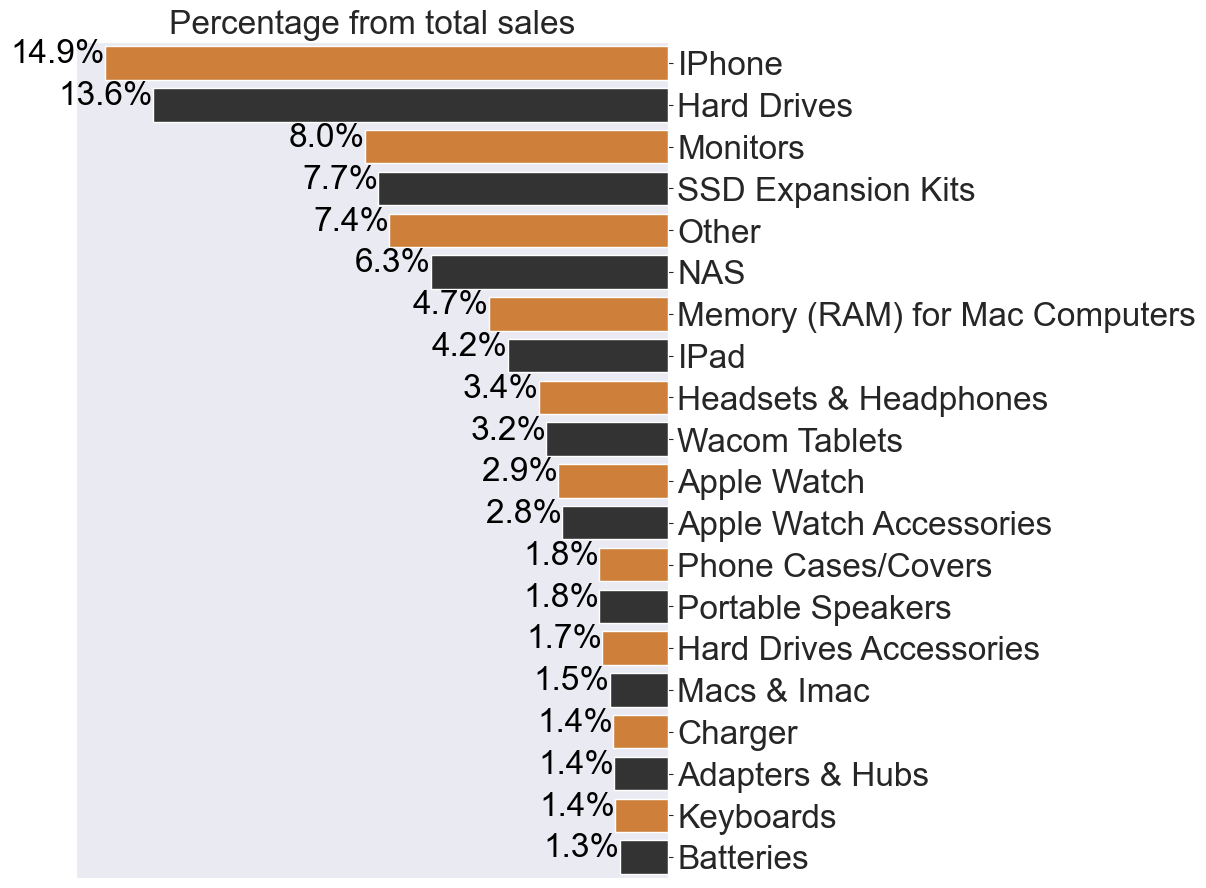

In [ ]:
# make a bar plot from sorted_price by using seaborn
limit_row = 20
size_font = 24
# palette = sns.color_palette("viridis", limit_row)
# palette[-1] = '#A0A0A0'  # Set specific color for the last bar
palette = ['#E67E22' if i % 2 == 0 else '#333333' for i in range(limit_row)]
sns.barplot(y=aggregated_revenue_df['product_category'][:limit_row], x=aggregated_revenue_df['unit_price_percentage'][:limit_row], palette=palette)
# Invert x-axis to go right to left
plt.gca().invert_xaxis()
ax = plt.gca()
# Move y-axis to the right
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.title('Percentage from total sales', fontsize=size_font)
plt.ylabel('', fontsize=size_font)
plt.xlabel('', fontsize=size_font)
# plt.xlabel('Percentage from total sales', fontsize=size_font)
plt.xticks(fontsize=size_font)
plt.xticks([], fontsize=size_font)
plt.yticks(fontsize=size_font)
# sns.set_style("dark", {"axes.facecolor": "0.9"})


# Custom function for float formatting
float_formatter = FuncFormatter(lambda x, _: f'{x:.0f}')
# Force float notation
ax.xaxis.set_major_formatter(float_formatter)
# Add values next to each bar
for index, value in enumerate(aggregated_revenue_df['unit_price_percentage'][:limit_row]):
    ax.text(value, index, f'{value:.1f}%', color='black', ha="right", fontsize=size_font)
sns.set_style("dark")
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()
plt.savefig('./plots/Top_revenue_percentage' + '.png')
plt.show()


/var/folders/qp/byv49jm10nl3sccrqp350xn80000gn/T/ipykernel_2721/1814066642.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sorted_categories = categories_df.groupby('product_category').sum().sort_values(by='unit_price', ascending=False).index[:limit_row]
/var/folders/qp/byv49jm10nl3sccrqp350xn80000gn/T/ipykernel_2721/1814066642.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=pd.Categorical(categories_df['product_category'], categories=sorted_categories, ordered=True),
/var/folders/qp/byv49jm10nl3sccrqp350xn80000gn/T/ipykernel_2721/1814066642.py:5: UserWarning: The palette list has more values (14) than needed (13), which may not be in

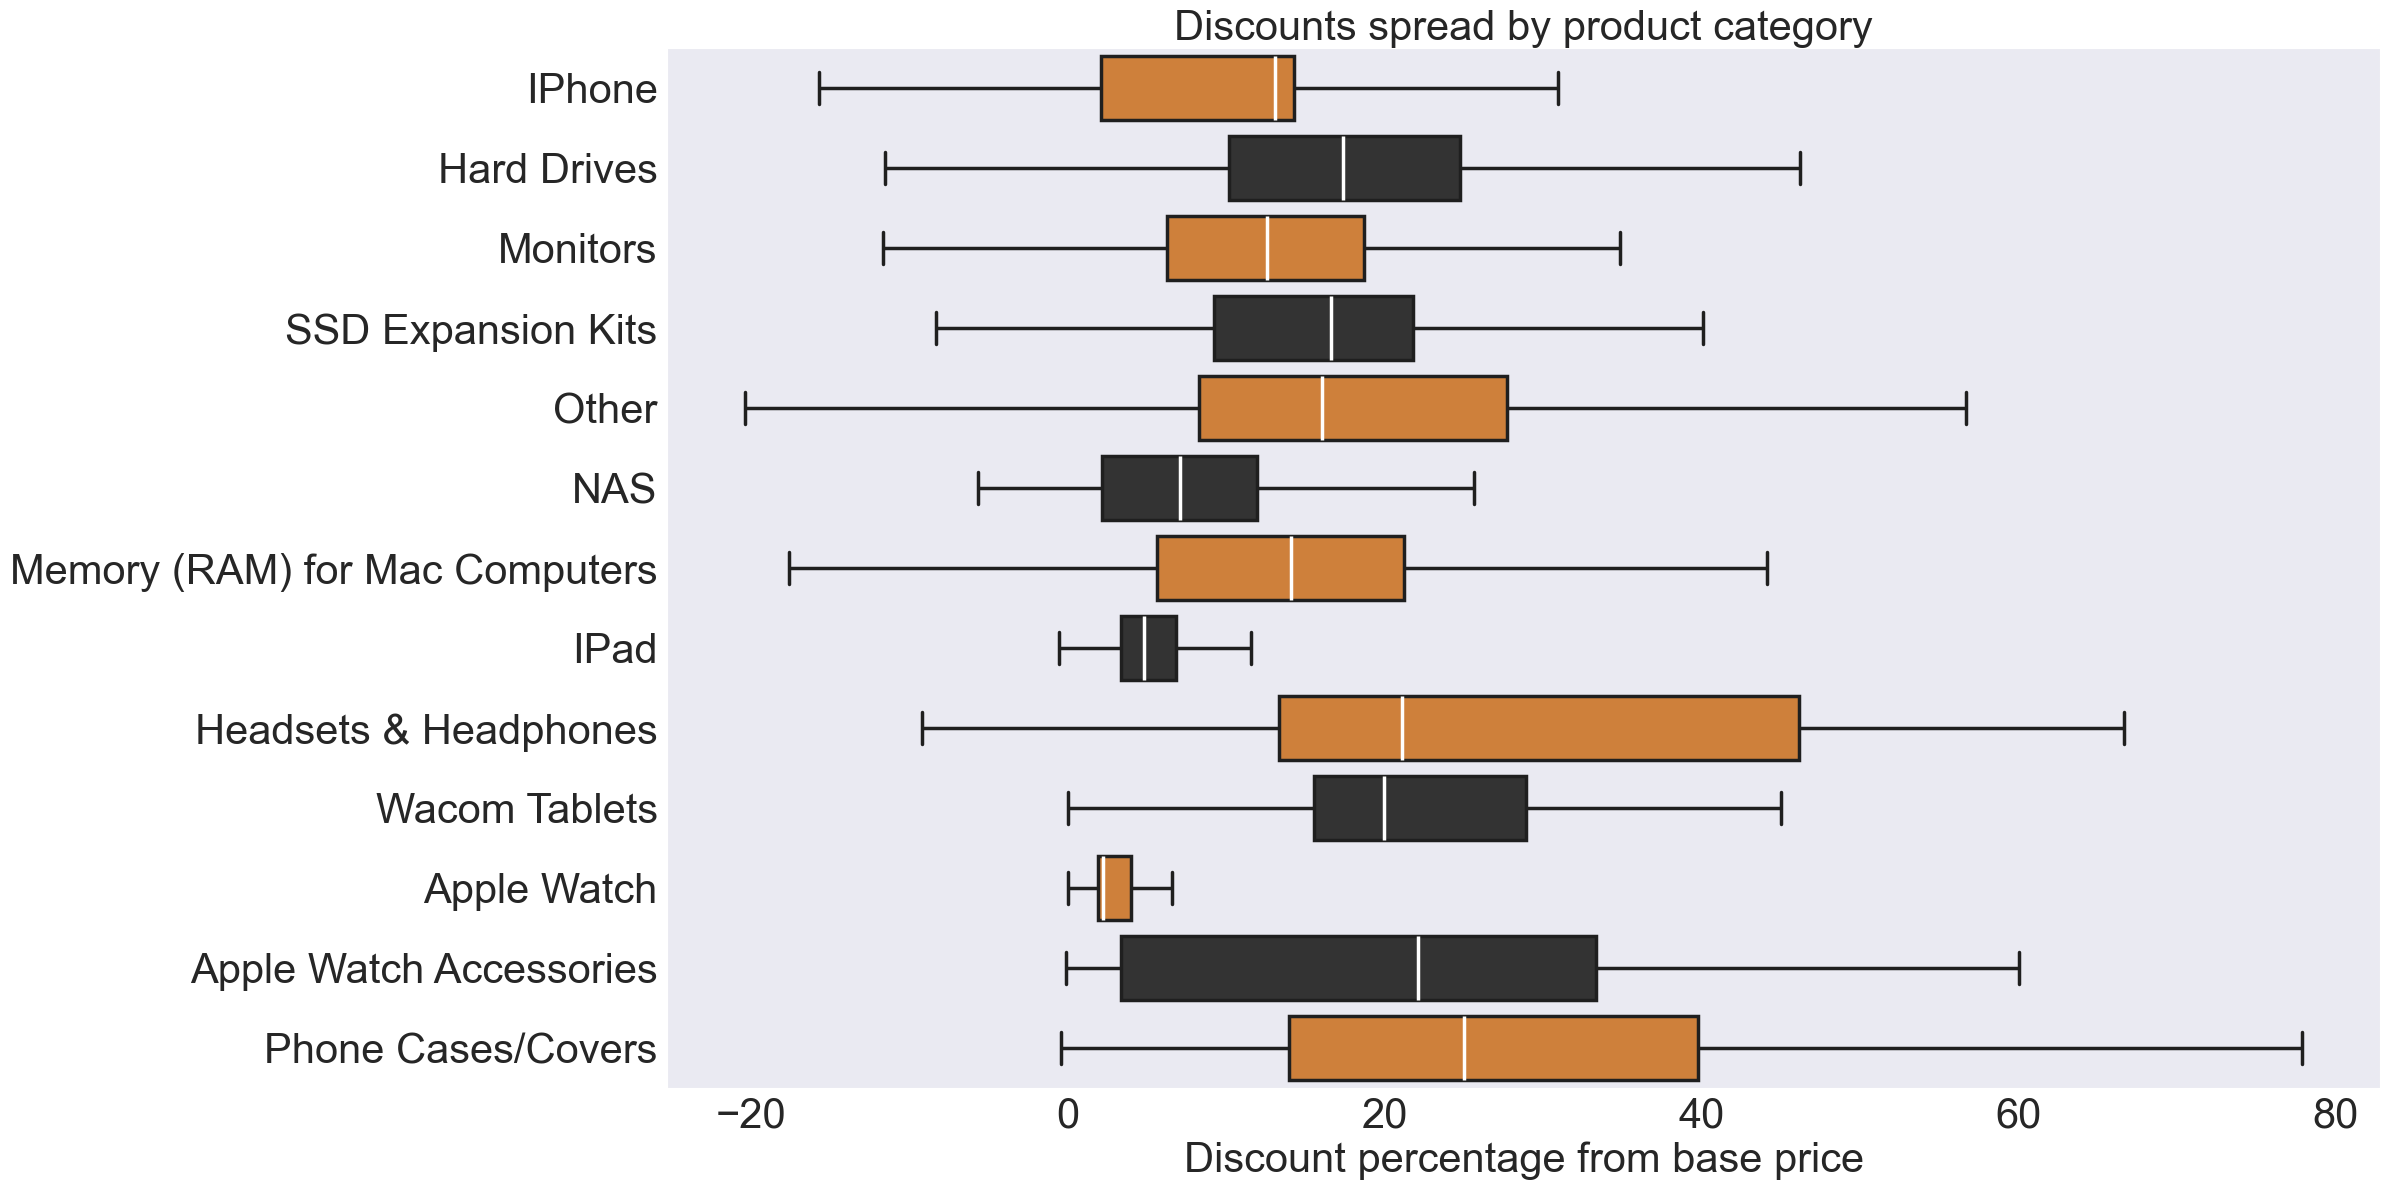

In [ ]:
limit_row = 13
size_font = 30
plt.figure(figsize=(24, 12))
sorted_categories = categories_df.groupby('product_category').sum().sort_values(by='unit_price', ascending=False).index[:limit_row]
ax = sns.boxplot(y=pd.Categorical(categories_df['product_category'], categories=sorted_categories, ordered=True),
                 x=categories_df['discount %'], showfliers=False,
                 palette=['#E67E22', '#333333'] * (len(sorted_categories) // 2 + 1), linewidth=2.5,
                 medianprops=dict(color="#FFFFFF", linewidth=2.5))
plt.xticks(fontsize=size_font)
plt.yticks(rotation=0, fontsize=size_font)
plt.ylabel('', fontsize=size_font)
plt.xlabel('Discount percentage from base price', fontsize=size_font)
plt.title('Discounts spread by product category', fontsize=size_font)

plt.tight_layout()
plt.savefig('./plots/Discounts_spread' + '.png')
plt.show()